In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import warnings
warnings.filterwarnings('ignore')

In [ ]:
x_train = np.loadtxt("/content/drive/MyDrive/DEEP LEARNING DATASETS/Image_Classification/input.csv",delimiter = ',')
y_train = np.loadtxt("/content/drive/MyDrive/DEEP LEARNING DATASETS/Image_Classification/labels.csv",delimiter = ',')

x_test = np.loadtxt('/content/drive/MyDrive/DEEP LEARNING DATASETS/Image_Classification/input_test.csv',delimiter = ',')
y_test = np.loadtxt("/content/drive/MyDrive/DEEP LEARNING DATASETS/Image_Classification/labels_test.csv",delimiter = ',')


In [ ]:
x_train[0]

array([37., 39., 25., ..., 58., 54., 29.])

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [ ]:
print('Min pixel value:',x_train.min())
print('Max pixel value:',x_train.max())


Min pixel value: 0.0
Max pixel value: 255.0


In [ ]:
# reshape the training data
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

# reshape the test data
x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [ ]:
# data scaling
x_train /= 255.0
x_test /= 255.0

In [ ]:
np.unique(y_train) #shows that it is a binary classification problem

array([0., 1.])

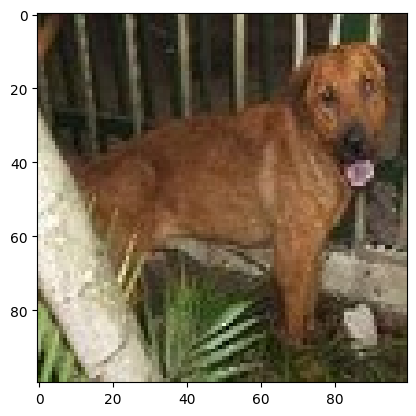

The target label is : [0.]


In [ ]:
# print the first image with its label
plt.imshow(x_train[0,:])
plt.show()

print('The target label is :',y_train[0])

In [ ]:
# Conventional way:- currently being used in the industry
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    # second conv layer
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),

    # flatten
    Flatten(),

    # First Dense layer
    Dense(70,activation = 'relu'),

    # output layer
    Dense(1,activation = 'sigmoid')
])

In [ ]:
# compile the model :- back propagation
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.5500 - loss: 0.7026
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6505 - loss: 0.6375
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7202 - loss: 0.5471
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7758 - loss: 0.4624
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8056 - loss: 0.4006
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8760 - loss: 0.3012
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9245 - loss: 0.1969
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9423 - loss: 0.1651
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9781 - loss: 0.1013
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9743 - loss: 0.0764


In [ ]:
# evaluate the model
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6760 - loss: 1.1603


[1.1307603120803833, 0.6650000214576721]

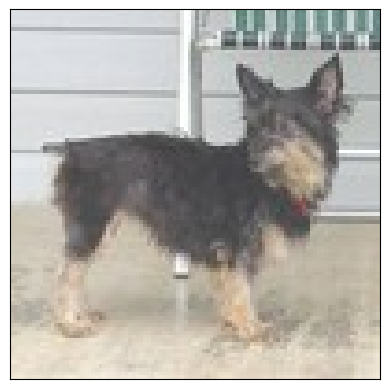

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
Prediction Probability:  [[0.07391378]]
The actual image is a  Dog
The predicted image is a  Dog


In [ ]:
# random image prediction from the test dataset
rdm_img = random.randint(0,len(x_test))
plt.imshow(x_test[rdm_img,:])
plt.xticks([])
plt.yticks([])
plt.show()

# actual label from the y_test
actual = 'Dog' if y_test[rdm_img,:] == 0 else 'Cat'

# prediction for the given image
y_pred = model.predict(x_test[rdm_img,:].reshape(1,100,100,3))
print('Prediction Probability: ',y_pred)

# prediction condition
predicted = 'Cat' if y_pred >= 0.5 else 'Dog'

print('The actual image is a ',actual)
print('The predicted image is a ',predicted)
